# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Muhammad Nibroos Abrar
- Email: mnibroosabrar@gmail.com
- Id Dicoding: nibroos_a

## Persiapan

### Menyiapkan library yang dibutuhkan

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

Pada tahap ini, kita mengimpor semua library yang dibutuhkan untuk proses:
- Pemrosesan dan manipulasi data (`pandas`, `numpy`).
- Visualisasi data (`seaborn`, `matplotlib.pyplot`).
- Pra-pemrosesan dan pemisahan data (`train_test_split`, `StandardScaler`, `LabelEncoder`).
- Pemodelan machine learning (`RandomForestClassifier`, `LogisticRegression`).
- Evaluasi performa model (`classification_report`, `confusion_matrix`, `roc_auc_score`, `roc_curve`).
- Menyimpan model (`joblib`).

### Menyiapkan data yang akan diguankan

## Data Understanding

In [121]:
# Load dataset
df = pd.read_csv('data.csv', sep=';')

Dataset dibaca dari file `data.csv` menggunakan `pandas.read_csv()` dengan separator `;`. Kemudian, kita tampilkan 5 baris pertama menggunakan `df.head()` untuk memastikan data berhasil dimuat dan memahami struktur awal dataset.


In [122]:
# Lihat 5 data pertama
print(df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

Perintah `df.head()` digunakan untuk menampilkan 5 baris pertama dari dataset. Ini membantu kita memahami bentuk data awal, seperti nama kolom, jenis data, dan contoh isi setiap fitur.

In [123]:
# Info data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Perintah `df.info()` memberikan informasi tentang:
- Jumlah entri (baris) dalam dataset.
- Jumlah kolom dan nama-namanya.
- Tipe data setiap kolom.
- Jumlah nilai non-null di setiap kolom.

Hal ini membantu kita mengetahui apakah ada data yang hilang dan apakah tipe data sudah sesuai.

In [124]:
# Jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 4424
Jumlah kolom: 37


Dengan menggunakan `df.shape`, kita bisa mengetahui:
- Jumlah total baris (observasi/data point).
- Jumlah total kolom (fitur).

Informasi ini berguna untuk memahami dimensi dataset sebelum proses analisis lebih lanjut.

In [125]:
# Tipe data tiap kolom
print(df.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

Dengan `df.dtypes`, kita melihat tipe data dari setiap kolom, apakah bertipe `int64`, `float64`, atau `object` (biasanya untuk data kategorikal). Tipe data ini penting karena akan mempengaruhi teknik preprocessing yang akan digunakan.

In [126]:
# Cek missing values
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Menggunakan `df.isnull().sum()`, kita menghitung jumlah nilai yang hilang (missing/null) di setiap kolom. Jika ada kolom dengan nilai hilang, kita perlu melakukan penanganan seperti imputasi (pengisian) atau penghapusan data.


In [127]:
# Statistik numerik
print(df.describe())

       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

`df.describe()` memberikan statistik deskriptif seperti mean, std, min, dan max.

In [128]:
# Statistik kategorikal
print(df.describe(include='object'))

          Status
count       4424
unique         3
top     Graduate
freq        2209


`df.describe(include='object')` memberikan statistik deskriptif seperti mean, std, min, dan max khusus tipe data object (non numerik).

In [129]:
# Cek jumlah target kelas
print(df['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


`df['Status'].value_counts()` menghitung jumlah data per kelas pada kolom Status.

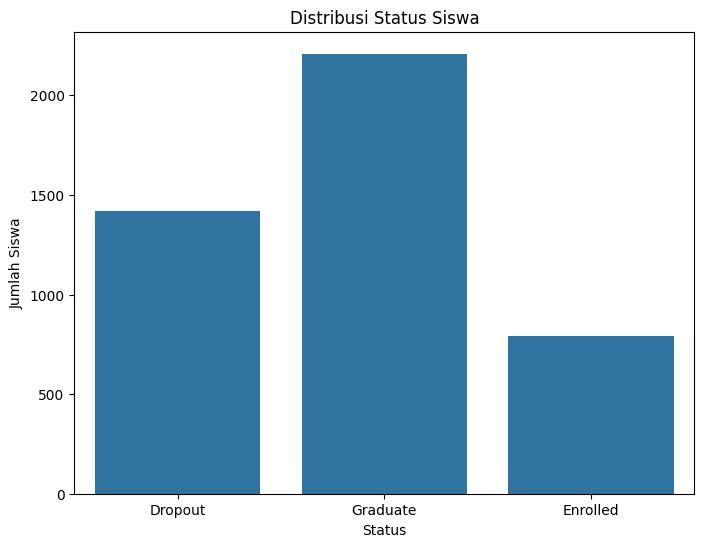


Proporsi tiap Status:
Status
Graduate    49.93%
Dropout     32.12%
Enrolled    17.95%
Name: proportion, dtype: object


In [130]:
# Distribusi kelas Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title("Distribusi Status Siswa")
plt.xlabel("Status")
plt.ylabel("Jumlah Siswa")
plt.show()

# Proporsi Status
status_rate = df['Status'].value_counts(normalize=True)
print("\nProporsi tiap Status:")
print(status_rate.multiply(100).round(2).astype(str) + '%')

Column names in the dataset:
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


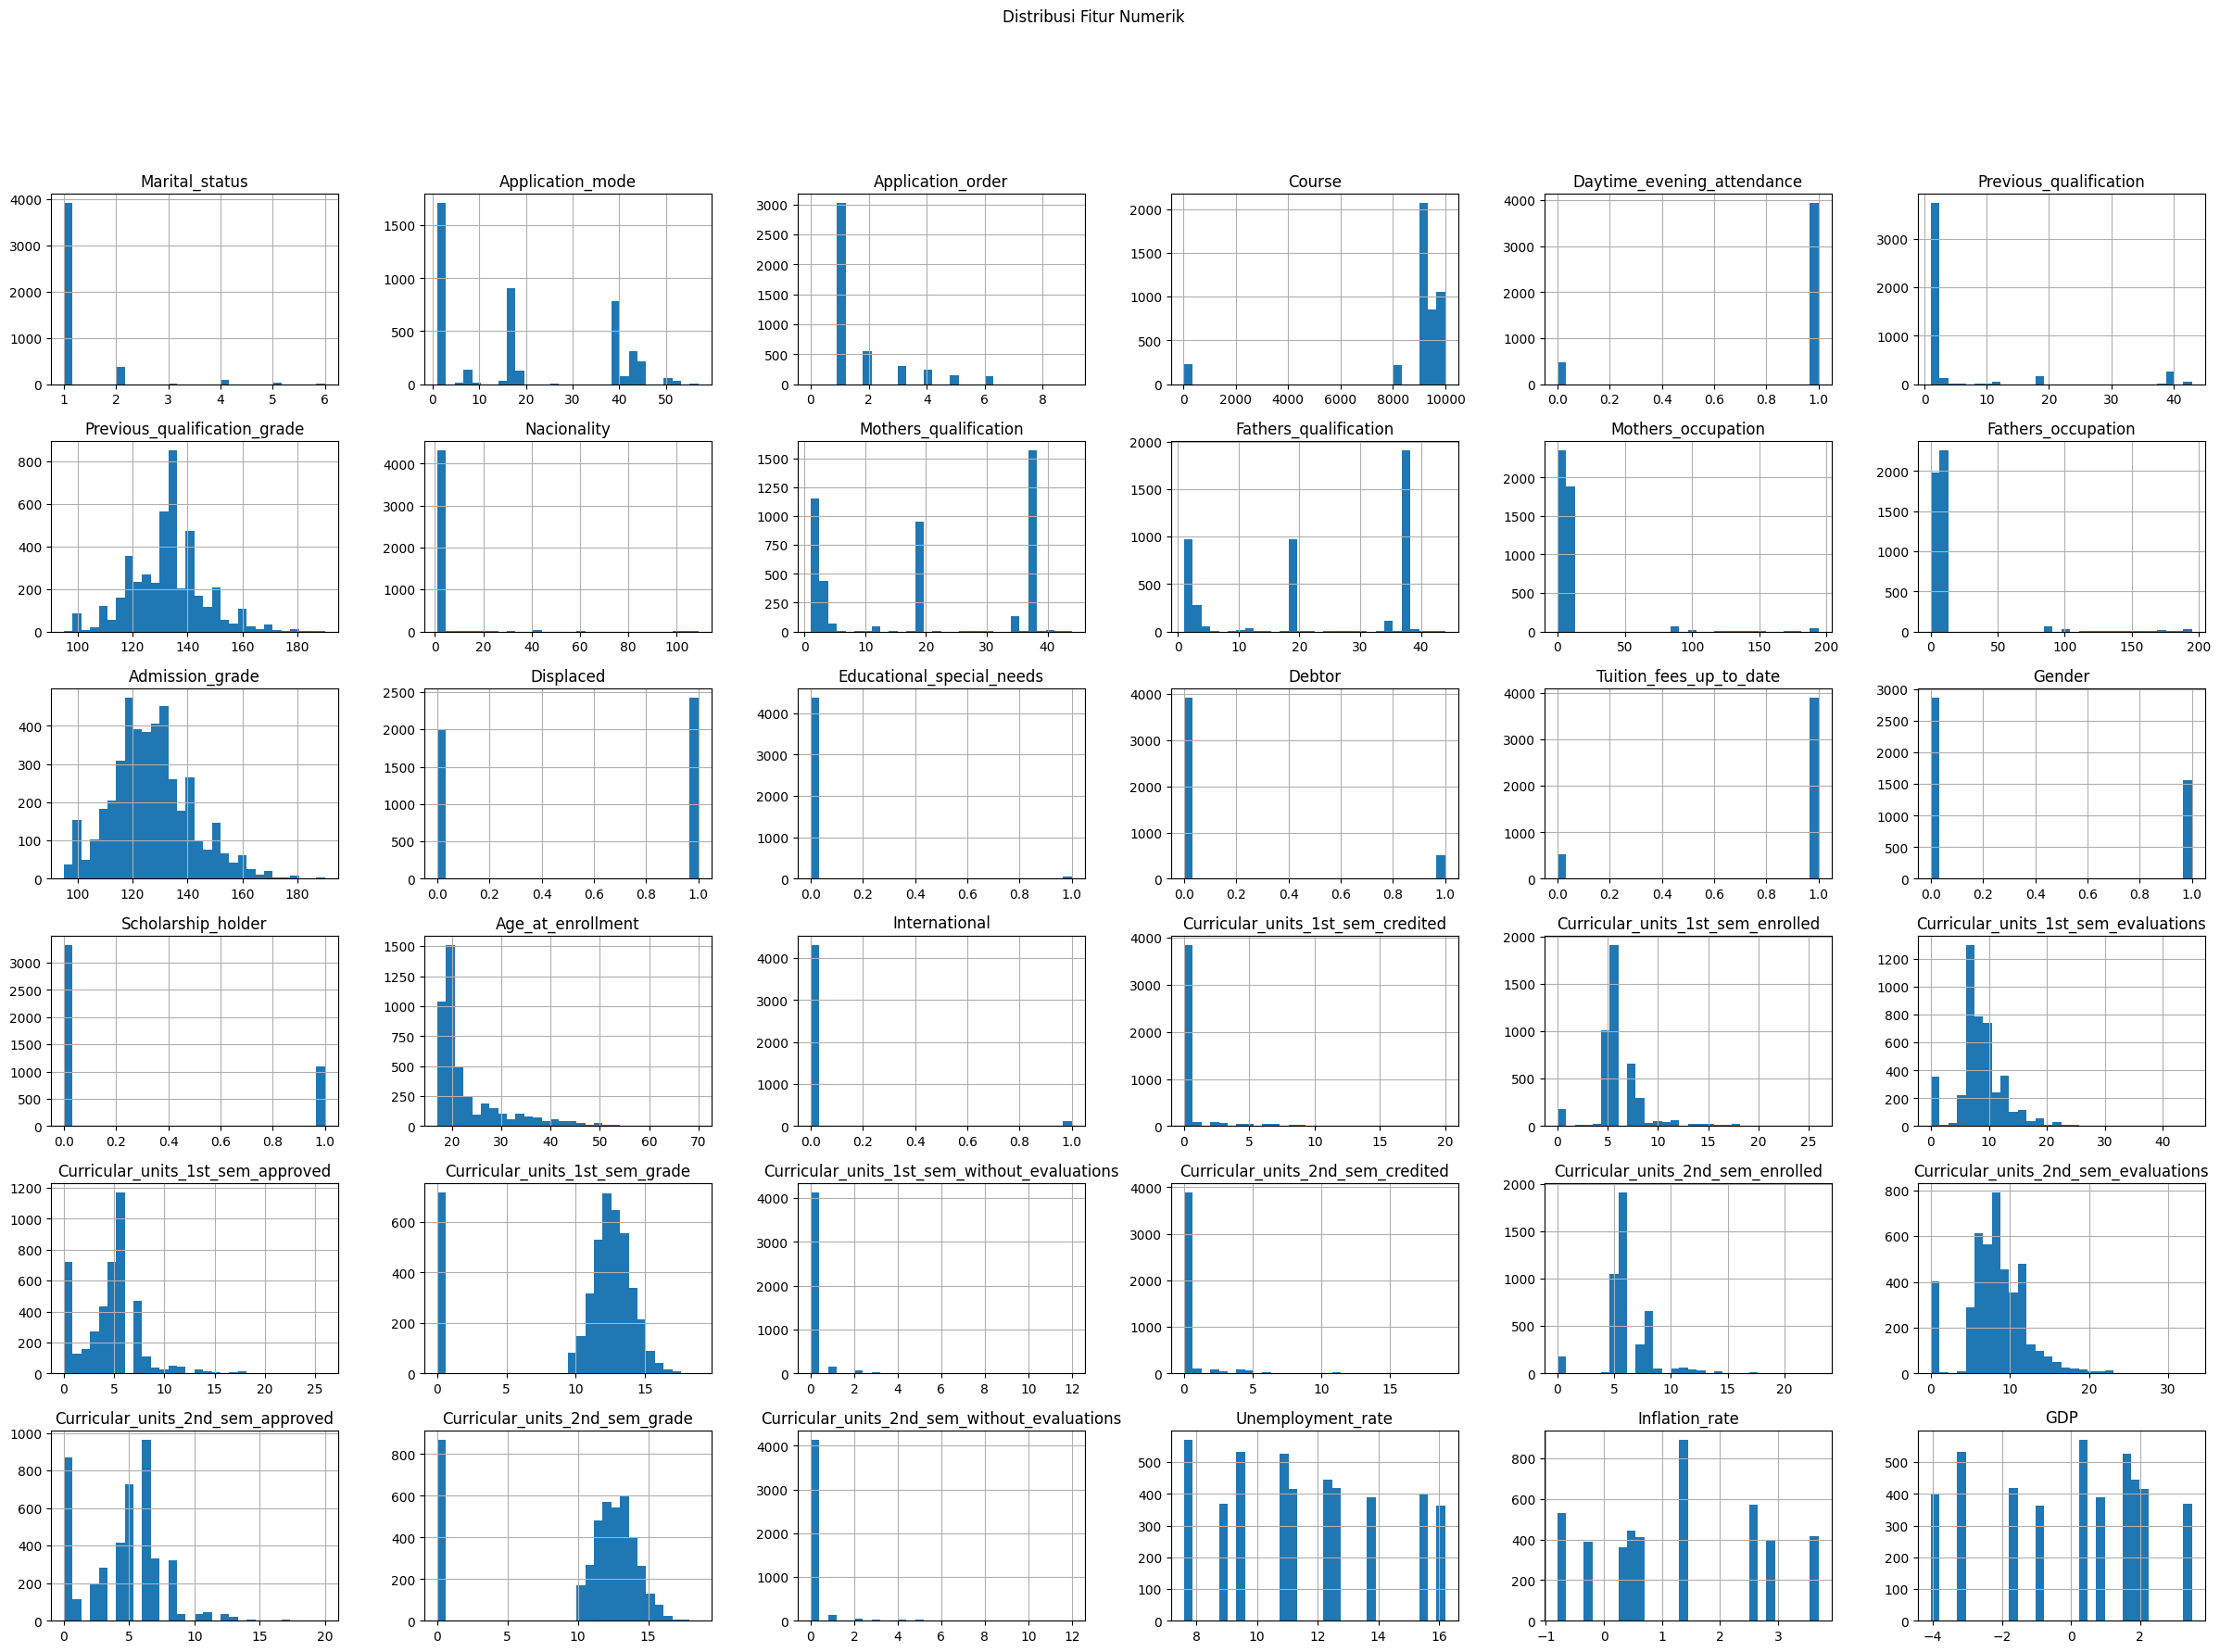

In [131]:
# Print all column names to verify
print("Column names in the dataset:")
print(df.columns.tolist())

# Then modify the histogram code to handle columns safely
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Remove the .drop('Status') part until we confirm the column name

df[numerical_cols].hist(figsize=(30, 20), bins=30)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

Visualisasi distribusi dengan `sns.countplot()` dan `sns.pairplot()` membantu melihat apakah data seimbang atau tidak, serta melihat hubungan antar fitur dan label secara visual.

## Data Preparation / Preprocessing

In [132]:
# Hapus baris yang mengandung nilai null
df = df.dropna()

Menghapus baris yang mengandung nilai null untuk menjamin data lengkap, mencegah error selama training model, dan meningkatkan kualitas data 

In [133]:
# Encode Status column in the DataFrame (Dropout = 1, others = 0)
df['Status'] = df['Status'].apply(lambda x: 1 if x.lower() == "dropout" else 0)

Label (kolom target) yang berupa data kategorikal perlu diubah menjadi bentuk numerik (encoding). Ini penting agar algoritma machine learning bisa memproses data tersebut


In [134]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


Menampilkan 5 data teratas untuk memastikan bahwa pre-processing data berjalan dengan lancar

In [135]:
# Pisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

Kita memisahkan kolom fitur (`X`) dari kolom target (`y`):
- `X` berisi seluruh kolom kecuali 'Status'.
- `y` hanya berisi kolom 'Status'.

Ini merupakan tahap penting sebelum dilakukan pembagian data dan pelatihan model.

In [136]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Menggunakan `train_test_split`, data dibagi menjadi:
- 80% data latih (`X_train`, `y_train`)
- 20% data uji (`X_test`, `y_test`)

Tujuan pemisahan ini adalah agar model dapat diuji performanya pada data yang belum pernah dilihat sebelumnya (data testing).


In [137]:

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`StandardScaler` digunakan untuk melakukan standardisasi fitur numerik agar memiliki rata-rata 0 dan standar deviasi 1. Ini membantu model konvergen lebih cepat dan performa lebih stabil, terutama untuk algoritma berbasis jarak dan gradien.

## Modeling

In [138]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Pada tahap ini, kita membangun model klasifikasi menggunakan algoritma **Logistic Regression**, yaitu salah satu algoritma supervised learning yang banyak digunakan untuk klasifikasi biner atau multikelas.


In [139]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RandomForest tidak butuh scaling

RandomForestClassifier(random_state=42)

Pada tahap ini, kita membangun model klasifikasi menggunakan algoritma **Random Forest Classifier**, yaitu salah satu algoritma supervised learning yang banyak digunakan untuk klasifikasi biner atau multikelas.


## Evaluation

In [140]:
# Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1]))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.89      0.74      0.81       284

    accuracy                           0.89       885
   macro avg       0.89      0.85      0.86       885
weighted avg       0.89      0.89      0.88       885

Confusion Matrix:
 [[575  26]
 [ 75 209]]
ROC AUC Score: 0.9266070633451289


Kita mengevaluasi performa model dengan:
- `classification_report`: Menampilkan precision, recall, f1-score, dan support untuk tiap kelas.
- `confusion_matrix`: Menampilkan matriks kesalahan klasifikasi.
- `roc_auc_score`: Mengukur kualitas prediksi probabilitas dengan AUC (Area Under Curve) dari kurva ROC.

c:\Users\Nibroos\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


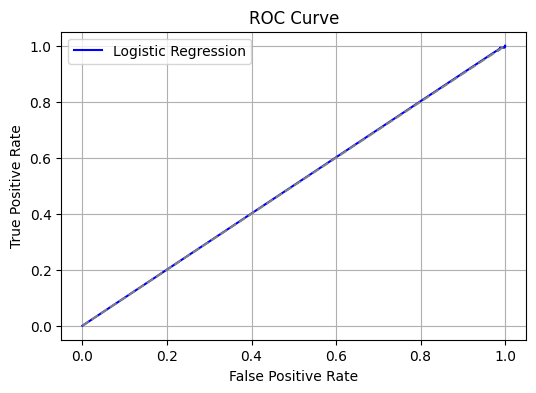

In [141]:
# ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

ROC Curve menunjukkan trade-off antara True Positive Rate dan False Positive Rate. Digunakan untuk menilai seberapa baik model membedakan antara kelas.


In [142]:
# Random Forest
y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.89      0.73      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885

Confusion Matrix:
 [[575  26]
 [ 78 206]]
ROC AUC Score: 0.9291819971409154


Kita mengevaluasi performa model dengan:
- `classification_report`: Menampilkan precision, recall, f1-score, dan support untuk tiap kelas.
- `confusion_matrix`: Menampilkan matriks kesalahan klasifikasi.
- `roc_auc_score`: Mengukur kualitas prediksi probabilitas dengan AUC (Area Under Curve) dari kurva ROC.

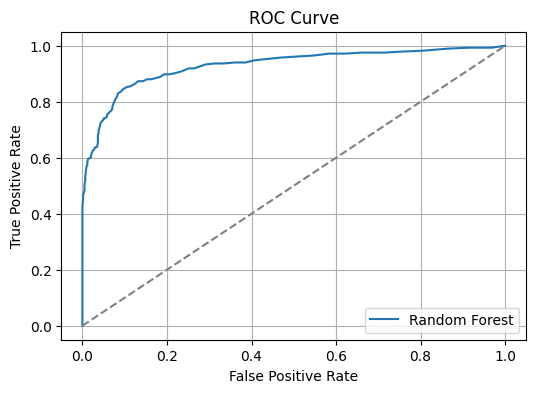

In [143]:
# ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

ROC Curve menunjukkan trade-off antara True Positive Rate dan False Positive Rate. Digunakan untuk menilai seberapa baik model membedakan antara kelas.


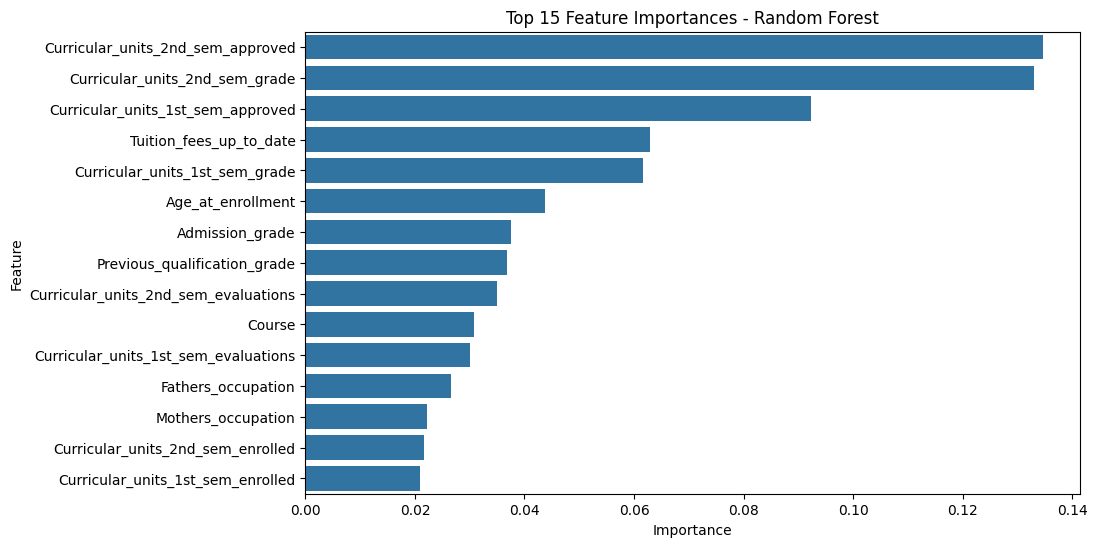

In [144]:

# Fitur penting
importances = rf.feature_importances_
feat_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

Kode ini digunakan untuk menampilkan **grafik pentingnya fitur** (feature importance) dari model **Random Forest**. Prosesnya adalah sebagai berikut:
1. Mengambil nilai pentingnya fitur dari model (`rf.feature_importances_`).
2. Membuat DataFrame yang menghubungkan nama fitur dengan nilai pentingnya.
3. Menyortir fitur berdasarkan pentingnya secara menurun.
4. Menampilkan grafik batang (bar plot) untuk 15 fitur teratas yang paling berpengaruh.

## Save Model

In [145]:
# Compare models using ROC AUC scores
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("ROC AUC Scores:")
print(f"Logistic Regression: {roc_auc_logreg:.4f}")
print(f"Random Forest: {roc_auc_rf:.4f}")

# Select and save the best model
if roc_auc_rf > roc_auc_logreg:
    print("\nRandom Forest performs better. Saving Random Forest model...")
    best_model = rf
    model_filename = "model/random_forest_model.joblib"
else:
    print("\nLogistic Regression performs better. Saving Logistic Regression model...")
    best_model = logreg
    model_filename = "model/logistic_regression_model.joblib"

# Save the model
joblib.dump(best_model, model_filename)

# Save the scaler if Logistic Regression is the best model
if best_model == logreg:
    scaler_filename = "model/scaler.joblib"
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler saved in model/")
else:
    print(f"Model saved in model/")

ROC AUC Scores:
Logistic Regression: 0.9266
Random Forest: 0.9292

Random Forest performs better. Saving Random Forest model...
Model saved in model/


Menggunakan `joblib.dump()`, model yang sudah dilatih disimpan ke file `.joblib` agar bisa digunakan kembali tanpa perlu melatih ulang. Penyimpanan model ditentukan berdasarkan ROC AUC Score terbaik